In [41]:
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import cv2
##Para conectar con el drive
from google.colab import drive
from google.colab.patches import cv2_imshow
from skimage import io,filters
drive.mount('/content/drive')
##Direción de la imagen
PATH = '/content/drive/Shareddrives/Los mejorcitos/Base de datos equilibrada x/BD 3 X (270)/Scab/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Segmentación hoja y zona enferma**

In [27]:
name = str(rn.randint(270,320)) #imagen aleatoria
img = cv2.imread(PATH + name + ".jpg", cv2.IMREAD_COLOR)
#conversion escala de grises
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# **POR PARTES**

Text(0.5, 1.0, 'Color')

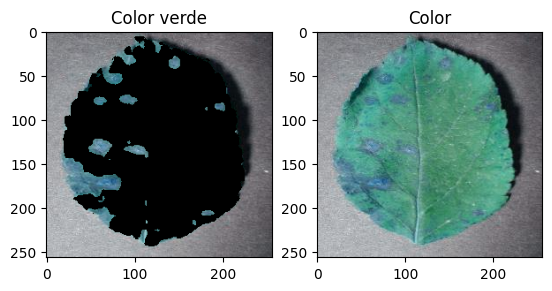

In [ ]:
name = str(rn.randint(270,320)) #imagen aleatoria
img = cv2.imread(PATH + name + ".jpg", cv2.IMREAD_COLOR)
#conversion escala de grises
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

# Convertir la imagen al espacio de color HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definir el rango de color de la hoja en HSV
lower_green = np.array([30, 30, 30])  # Ajusta los valores según tus necesidades
upper_green = np.array([70, 255, 255])  # Ajusta los valores según tus necesidades

# Aplicar la segmentación por umbralización en el espacio de color HSV
mask = cv2.inRange(hsv, lower_green, upper_green)

# Invertir la máscara para obtener el fondo en negro y la hoja en blanco
mask_inverse = cv2.bitwise_not(mask)

# Aplicar la máscara invertida a la imagen original
result = cv2.bitwise_and(img, img, mask=mask_inverse)

plt.subplot(121)
plt.imshow(result)
plt.title('Color verde')

plt.subplot(122)
plt.imshow(img)
plt.title('Color')

Text(0.5, 1.0, 'Color')

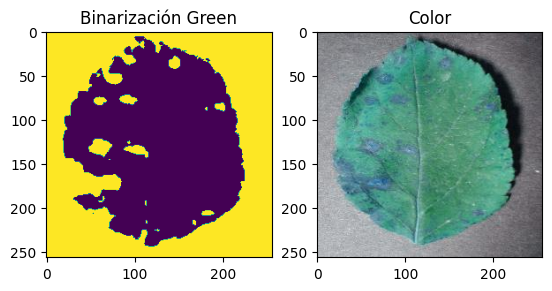

In [ ]:
green_segmentation =cv2.cvtColor(result,cv2.COLOR_BGR2GRAY)
# Aplicar una umbralización para obtener los píxeles que superan el umbral
threshold_value = 0  # Ajusta este valor según tus necesidades
_, binary_segmentation_green = cv2.threshold(green_segmentation, threshold_value, 255, cv2.THRESH_BINARY)

# Mostrar la imagen binarizada
plt.subplot(121)
plt.imshow(binary_segmentation_green)
plt.title('Binarización Green')

plt.subplot(122)
plt.imshow(img)
plt.title('Color')

Text(0.5, 1.0, 'Color')

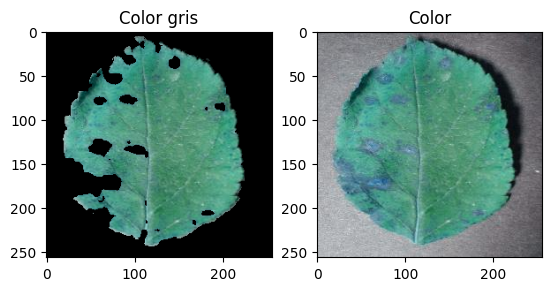

In [ ]:
# Aplicar la máscara a la imagen original
result2 = cv2.bitwise_and(img, img, mask=mask)

plt.subplot(121)
plt.imshow(result2)
plt.title('Color gris')

plt.subplot(122)
plt.imshow(img)
plt.title('Color')

Text(0.5, 1.0, 'Color')

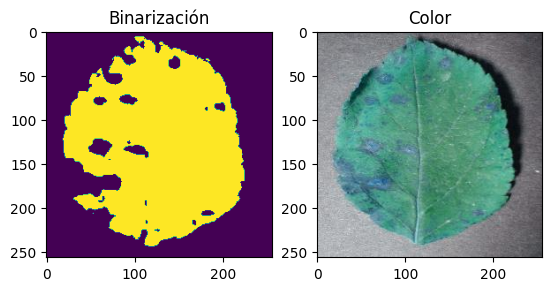

In [ ]:
gray_segmentation=cv2.cvtColor(result2,cv2.COLOR_BGR2GRAY)
# Aplicar una umbralización para obtener los píxeles que superan el umbral
threshold_value = 0  # Ajusta este valor según tus necesidades
_, binary_segmentation = cv2.threshold(gray_segmentation, threshold_value, 255, cv2.THRESH_BINARY)

# Mostrar la imagen binarizada
plt.subplot(121)
plt.imshow(binary_segmentation)
plt.title('Binarización')

plt.subplot(122)
plt.imshow(img)
plt.title('Color')

Text(0.5, 1.0, 'Contornos')

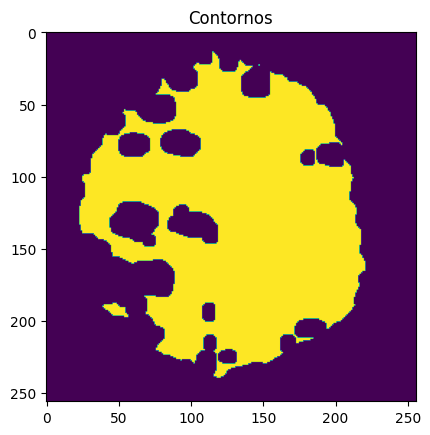

In [ ]:
kernel_3 = 3 
kernel_3 = np.ones((kernel_3, kernel_3), np.uint8)
dilated_segmentation_32 = cv2.dilate(binary_segmentation, kernel_3, iterations=2)
closed_segmentation_32 = cv2.erode(binary_segmentation, kernel_3, iterations=2)
edges = cv2.Canny(closed_segmentation_32, 30, 70)  # Ajusta los valores de umbral según tus necesidades

# Dibujar los contornos encontrados en la imagen original
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(closed_segmentation_32, contours, -1, (0, 255, 0), 2)

plt.subplot(111)
plt.imshow(closed_segmentation_32)
plt.title('Contornos')

In [ ]:
# Aplicar una operación morfológica de cierre para cerrar los contornos
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed_image = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Encontrar los contornos en la imagen cerrada
contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calcular el área de cada contorno y encontrar el contorno más grande
max_area = 0
max_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        max_contour = contour

# Crear una imagen binaria donde los píxeles tomen el valor de 255 en el contorno más grande y 0 en el resto de regiones
binary_image = np.zeros_like(edges)
cv2.drawContours(binary_image_2, [max_contour], -1, 255, cv2.FILLED)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
segmented_image = cv2.bitwise_and(img, img, mask=binary_image_2.astype(np.uint8))

Text(0.5, 1.0, 'Zona enferma')

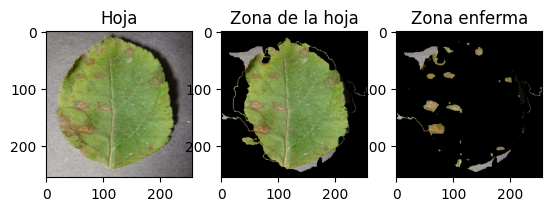

In [ ]:
# Convertir la imagen a espacio de color HSV
hsv_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2HSV)

# Definir el rango de colores verde en HSV
lower_green = np.array([30, 50, 50])
upper_green = np.array([90, 255, 255])

# Crear una máscara para los pixeles verdes
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Invertir la máscara para obtener las partes no verdes
non_green_mask = cv2.bitwise_not(green_mask)

# Aplicar la máscara a la imagen segmentada
non_green_segmented_image = cv2.bitwise_and(segmented_image, segmented_image, mask=non_green_mask)

# Mostrar la imagen segmentada de partes no verdes

plt.subplot(131)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Hoja')

plt.subplot(132)
segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)
plt.imshow(segmented_image)
plt.title('Zona de la hoja')

plt.subplot(133)
non_green_segmented_image = cv2.cvtColor(non_green_segmented_image, cv2.COLOR_BGR2RGB)
plt.imshow(non_green_segmented_image)
plt.title('Zona enferma')




# **UNIFICADO**


# *   Primer intento

<ipython-input-49-42a772c12afe>:88: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


Text(0.5, 1.0, 'Zona enferma')

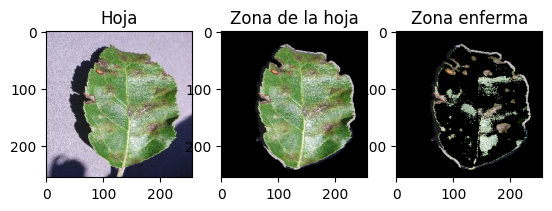

In [49]:
img = cv2.imread(PATH + str(800) + ".jpg", cv2.IMREAD_COLOR)
#conversion escala de grises
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Convertir la imagen al espacio de color HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definir el rango de color de la hoja en HSV
lower_green = np.array([30, 30, 30])  # Ajusta los valores según tus necesidades
upper_green = np.array([70, 255, 255])  # Ajusta los valores según tus necesidades

# Aplicar la segmentación por umbralización en el espacio de color HSV
mask = cv2.inRange(hsv, lower_green, upper_green)

# Invertir la máscara para obtener el fondo en negro y la hoja en blanco
mask_inverse = cv2.bitwise_not(mask)

# Aplicar la máscara invertida a la imagen original
result = cv2.bitwise_and(img, img, mask=mask_inverse)
##### Fondo ok, zona sana nok, zona enferma ok#########################


gray_segmentation = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
# Aplicar una umbralización para obtener los píxeles que superan el umbral
threshold_value = 0  # Ajusta este valor según tus necesidades
_, binary_segmentation = cv2.threshold(gray_segmentation, threshold_value, 255, cv2.THRESH_BINARY)
result2 = cv2.bitwise_and(img, img, mask=mask)

###F Fondo NOK, zona sana ok, enfermedad NOK###################

kernel_3 = 3
kernel_3 = np.ones((kernel_3, kernel_3), np.uint8)
dilated_segmentation_32 = cv2.dilate(binary_segmentation, kernel_3, iterations=2)
closed_segmentation_32 = cv2.erode(binary_segmentation, kernel_3, iterations=2)
edges = cv2.Canny(closed_segmentation_32, 30, 70)  # Ajusta los valores de umbral según tus necesidades
# Dibujar los contornos encontrados en la imagen original
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


####### IMAGEN BINARIA FONDO 255, ZONA SANA 0, ZONA ENFERMA 255 (closed segmentation_32)#######
plt.subplot(111)
plt.imshow(closed_segmentation_32)
plt.title('closed_segmentation_32')



# Aplicar una operación morfológica de cierre para cerrar los contornos
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed_image = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Encontrar los contornos en la imagen cerrada
contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calcular el área de cada contorno y encontrar el contorno más grande
max_area = 0
max_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        max_contour = contour

# Crear una imagen binaria donde los píxeles tomen el valor de 255 en el contorno más grande y 0 en el resto de regiones
binary_image = np.zeros_like(edges)
cv2.drawContours(binary_image, [max_contour], -1, 255, cv2.FILLED)


###### Imagen binaria, mascara de la hoja, fondo 0, toda la hoja 255


segmented_image = cv2.bitwise_and(img, img, mask=binary_image.astype(np.uint8))
###### Imagen original fondo 0, toda la hoja 255 segmented_image


# Convertir la imagen a espacio de color HSV
hsv_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2HSV)
# Definir el rango de colores verde en HSV
lower_green = np.array([30, 50, 50])
upper_green = np.array([90, 255, 255])
# Crear una máscara para los pixeles verdes
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)
# Invertir la máscara para obtener las partes no verdes
non_green_mask = cv2.bitwise_not(green_mask)
# Aplicar la máscara a la imagen segmentada
non_green_segmented_image = cv2.bitwise_and(segmented_image, segmented_image, mask=non_green_mask)
# Mostrar la imagen segmentada de partes no verdes

plt.subplot(131)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Hoja')

plt.subplot(132)
segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)
plt.imshow(segmented_image)
plt.title('Zona de la hoja')

plt.subplot(133)
non_green_segmented_image = cv2.cvtColor(non_green_segmented_image, cv2.COLOR_BGR2RGB)
plt.imshow(non_green_segmented_image)
plt.title('Zona enferma')




# *   Segundo intento Parte 4 (La mejor hasta el momento) (Segmentando verde, y grises)

<ipython-input-50-071131b33e68>:97: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


Text(0.5, 1.0, 'Zona enferma')

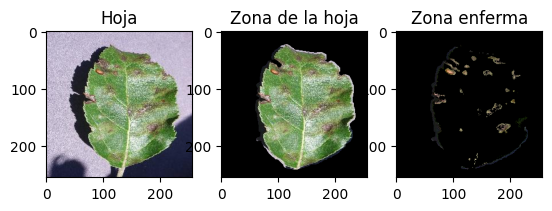

In [50]:
img = cv2.imread(PATH + str(800) + ".jpg", cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Convertir la imagen al espacio de color HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definir el rango de color de la hoja en HSV
lower_green = np.array([30, 30, 30])  # Ajusta los valores según tus necesidades
upper_green = np.array([70, 255, 255])  # Ajusta los valores según tus necesidades

# Aplicar la segmentación por umbralización en el espacio de color HSV
mask = cv2.inRange(hsv, lower_green, upper_green)

# Invertir la máscara para obtener el fondo en negro y la hoja en blanco
mask_inverse = cv2.bitwise_not(mask)

# Aplicar la máscara invertida a la imagen original
result = cv2.bitwise_and(img, img, mask=mask_inverse)
##### Fondo ok, zona sana nok, zona enferma ok#########################


gray_segmentation = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
# Aplicar una umbralización para obtener los píxeles que superan el umbral
threshold_value = 0  # Ajusta este valor según tus necesidades
_, binary_segmentation = cv2.threshold(gray_segmentation, threshold_value, 255, cv2.THRESH_BINARY)
result2 = cv2.bitwise_and(img, img, mask=mask)

###F Fondo NOK, zona sana ok, enfermedad NOK###################

kernel_3 = 3
kernel_3 = np.ones((kernel_3, kernel_3), np.uint8)
dilated_segmentation_32 = cv2.dilate(binary_segmentation, kernel_3, iterations=2)
closed_segmentation_32 = cv2.erode(binary_segmentation, kernel_3, iterations=2)
edges = cv2.Canny(closed_segmentation_32, 30, 70)  # Ajusta los valores de umbral según tus necesidades
# Dibujar los contornos encontrados en la imagen original
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


####### IMAGEN BINARIA FONDO 255, ZONA SANA 0, ZONA ENFERMA 255 (closed segmentation_32)#######
plt.subplot(111)
plt.imshow(closed_segmentation_32)
plt.title('closed_segmentation_32')



# Aplicar una operación morfológica de cierre para cerrar los contornos
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed_image = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Encontrar los contornos en la imagen cerrada
contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calcular el área de cada contorno y encontrar el contorno más grande
max_area = 0
max_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        max_contour = contour

# Crear una imagen binaria donde los píxeles tomen el valor de 255 en el contorno más grande y 0 en el resto de regiones
binary_image = np.zeros_like(edges)
cv2.drawContours(binary_image, [max_contour], -1, 255, cv2.FILLED)


###### Imagen binaria, mascara de la hoja, fondo 0, toda la hoja 255


segmented_image = cv2.bitwise_and(img, img, mask=binary_image.astype(np.uint8))
###### Imagen original fondo 0, toda la hoja 255 segmented_image


# Convertir la imagen a espacio de color HSV
hsv_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2HSV)

# Definir el rango de colores verde en HSV
lower_green = np.array([30, 50, 50])
upper_green = np.array([90, 255, 255])

# Definir el rango de colores gris en HSV
lower_gray = np.array([0, 0, 100])
upper_gray = np.array([179, 50, 255])

# Crear una máscara para los píxeles verdes
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Crear una máscara para los píxeles grises
gray_mask = cv2.inRange(hsv_image, lower_gray, upper_gray)

# Combinar las máscaras para obtener las partes no verdes y no grises
non_green_gray_mask = cv2.bitwise_and(cv2.bitwise_not(green_mask), cv2.bitwise_not(gray_mask))

# Aplicar la máscara a la imagen segmentada
non_green_gray_segmented_image = cv2.bitwise_and(segmented_image, segmented_image, mask=non_green_gray_mask)

plt.subplot(131)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Hoja')

plt.subplot(132)
segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)
plt.imshow(segmented_image)
plt.title('Zona de la hoja')

plt.subplot(133)
non_green_segmented_image = cv2.cvtColor(non_green_gray_segmented_image, cv2.COLOR_BGR2RGB)
plt.imshow(non_green_segmented_image)
plt.title('Zona enferma')


# *   Tercer intento con mascaras para color blanco oscuro, gris claro y gris oscuro

<ipython-input-51-f2de0ba88c54>:112: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


Text(0.5, 1.0, 'Zona enferma')

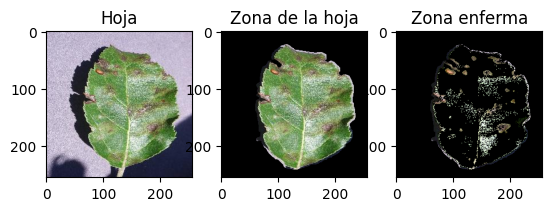

In [51]:
img = cv2.imread(PATH + str(800) + ".jpg", cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Convertir la imagen al espacio de color HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definir el rango de color de la hoja en HSV
lower_green = np.array([30, 30, 30])  # Ajusta los valores según tus necesidades
upper_green = np.array([70, 255, 255])  # Ajusta los valores según tus necesidades

# Aplicar la segmentación por umbralización en el espacio de color HSV
mask = cv2.inRange(hsv, lower_green, upper_green)

# Invertir la máscara para obtener el fondo en negro y la hoja en blanco
mask_inverse = cv2.bitwise_not(mask)

# Aplicar la máscara invertida a la imagen original
result = cv2.bitwise_and(img, img, mask=mask_inverse)
##### Fondo ok, zona sana nok, zona enferma ok#########################


gray_segmentation = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
# Aplicar una umbralización para obtener los píxeles que superan el umbral
threshold_value = 0  # Ajusta este valor según tus necesidades
_, binary_segmentation = cv2.threshold(gray_segmentation, threshold_value, 255, cv2.THRESH_BINARY)
result2 = cv2.bitwise_and(img, img, mask=mask)

###F Fondo NOK, zona sana ok, enfermedad NOK###################

kernel_3 = 3
kernel_3 = np.ones((kernel_3, kernel_3), np.uint8)
dilated_segmentation_32 = cv2.dilate(binary_segmentation, kernel_3, iterations=2)
closed_segmentation_32 = cv2.erode(binary_segmentation, kernel_3, iterations=2)
edges = cv2.Canny(closed_segmentation_32, 30, 70)  # Ajusta los valores de umbral según tus necesidades
# Dibujar los contornos encontrados en la imagen original
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


####### IMAGEN BINARIA FONDO 255, ZONA SANA 0, ZONA ENFERMA 255 (closed segmentation_32)#######
plt.subplot(111)
plt.imshow(closed_segmentation_32)
plt.title('closed_segmentation_32')



# Aplicar una operación morfológica de cierre para cerrar los contornos
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed_image = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Encontrar los contornos en la imagen cerrada
contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calcular el área de cada contorno y encontrar el contorno más grande
max_area = 0
max_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        max_contour = contour

# Crear una imagen binaria donde los píxeles tomen el valor de 255 en el contorno más grande y 0 en el resto de regiones
binary_image = np.zeros_like(edges)
cv2.drawContours(binary_image, [max_contour], -1, 255, cv2.FILLED)


###### Imagen binaria, mascara de la hoja, fondo 0, toda la hoja 255


segmented_image = cv2.bitwise_and(img, img, mask=binary_image.astype(np.uint8))
###### Imagen original fondo 0, toda la hoja 255 segmented_image


# Convertir la imagen a espacio de color HSV
hsv_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2HSV)

# Definir el rango de colores verde en HSV
lower_green = np.array([30, 50, 50])
upper_green = np.array([90, 255, 255])

# Definir el rango de colores gris claro en HSV
lower_gray_light = np.array([0, 0, 100])
upper_gray_light = np.array([179, 50, 200])

# Definir el rango de colores gris oscuro en HSV
lower_gray_dark = np.array([0, 0, 50])
upper_gray_dark = np.array([179, 50, 100])

# Definir el rango de colores blanco oscuro en HSV
lower_white_dark = np.array([0, 0, 0])
upper_white_dark = np.array([179, 50, 50])

# Crear una máscara para los píxeles verdes
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Crear una máscara para los píxeles de color gris claro
gray_light_mask = cv2.inRange(hsv_image, lower_gray_light, upper_gray_light)

# Crear una máscara para los píxeles de color gris oscuro
gray_dark_mask = cv2.inRange(hsv_image, lower_gray_dark, upper_gray_dark)

# Crear una máscara para los píxeles de color blanco oscuro
white_dark_mask = cv2.inRange(hsv_image, lower_white_dark, upper_white_dark)

# Combinar las máscaras para obtener las partes no verdes, no grises claros, no grises oscuros y no blancos oscuros
non_green_gray_white_mask = cv2.bitwise_and(cv2.bitwise_not(green_mask), cv2.bitwise_not(gray_light_mask), cv2.bitwise_not(gray_dark_mask), cv2.bitwise_not(white_dark_mask))

# Aplicar la máscara a la imagen segmentada
non_green_gray_white_segmented_image = cv2.bitwise_and(segmented_image, segmented_image, mask=non_green_gray_white_mask)


plt.subplot(131)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Hoja')

plt.subplot(132)
segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)
plt.imshow(segmented_image)
plt.title('Zona de la hoja')

plt.subplot(133)
non_green_segmented_image = cv2.cvtColor(non_green_gray_white_segmented_image, cv2.COLOR_BGR2RGB)
plt.imshow(non_green_segmented_image)
plt.title('Zona enferma')


# *   Cuarto intento resaltando zonas cafes


<ipython-input-52-a1bc3d9b65de>:88: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


Text(0.5, 1.0, 'Zona enferma')

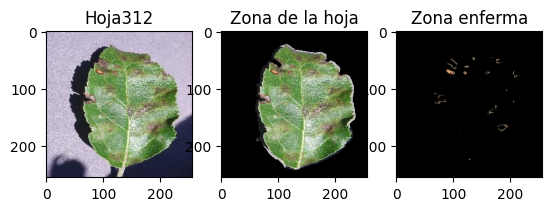

In [52]:
img = cv2.imread(PATH + str(800) + ".jpg", cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Convertir la imagen al espacio de color HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definir el rango de color de la hoja en HSV
lower_green = np.array([30, 30, 30])  # Ajusta los valores según tus necesidades
upper_green = np.array([70, 255, 255])  # Ajusta los valores según tus necesidades

# Aplicar la segmentación por umbralización en el espacio de color HSV
mask = cv2.inRange(hsv, lower_green, upper_green)

# Invertir la máscara para obtener el fondo en negro y la hoja en blanco
mask_inverse = cv2.bitwise_not(mask)

# Aplicar la máscara invertida a la imagen original
result = cv2.bitwise_and(img, img, mask=mask_inverse)
##### Fondo ok, zona sana nok, zona enferma ok#########################


gray_segmentation = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
# Aplicar una umbralización para obtener los píxeles que superan el umbral
threshold_value = 0  # Ajusta este valor según tus necesidades
_, binary_segmentation = cv2.threshold(gray_segmentation, threshold_value, 255, cv2.THRESH_BINARY)
result2 = cv2.bitwise_and(img, img, mask=mask)

###F Fondo NOK, zona sana ok, enfermedad NOK###################

kernel_3 = 3
kernel_3 = np.ones((kernel_3, kernel_3), np.uint8)
dilated_segmentation_32 = cv2.dilate(binary_segmentation, kernel_3, iterations=2)
closed_segmentation_32 = cv2.erode(binary_segmentation, kernel_3, iterations=2)
edges = cv2.Canny(closed_segmentation_32, 30, 70)  # Ajusta los valores de umbral según tus necesidades
# Dibujar los contornos encontrados en la imagen original
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


####### IMAGEN BINARIA FONDO 255, ZONA SANA 0, ZONA ENFERMA 255 (closed segmentation_32)#######
plt.subplot(111)
plt.imshow(closed_segmentation_32)
plt.title('closed_segmentation_32')



# Aplicar una operación morfológica de cierre para cerrar los contornos
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed_image = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Encontrar los contornos en la imagen cerrada
contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calcular el área de cada contorno y encontrar el contorno más grande
max_area = 0
max_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        max_contour = contour

# Crear una imagen binaria donde los píxeles tomen el valor de 255 en el contorno más grande y 0 en el resto de regiones
binary_image = np.zeros_like(edges)
cv2.drawContours(binary_image, [max_contour], -1, 255, cv2.FILLED)


###### Imagen binaria, mascara de la hoja, fondo 0, toda la hoja 255


segmented_image = cv2.bitwise_and(img, img, mask=binary_image.astype(np.uint8))
###### Imagen original fondo 0, toda la hoja 255 segmented_image


# Convertir la imagen a espacio de color HSV
hsv_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2HSV)

# Definir el rango de colores café en HSV
lower_brown = np.array([10, 50, 50])
upper_brown = np.array([20, 255, 255])

# Crear una máscara para los píxeles de color café
brown_mask = cv2.inRange(hsv_image, lower_brown, upper_brown)

# Aplicar la máscara a la imagen segmentada
brown_segmented_image = cv2.bitwise_and(segmented_image, segmented_image, mask=brown_mask)


plt.subplot(131)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Hoja' +str(name))

plt.subplot(132)
segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)
plt.imshow(segmented_image)
plt.title('Zona de la hoja')

plt.subplot(133)
non_green_segmented_image = cv2.cvtColor(brown_segmented_image, cv2.COLOR_BGR2RGB)
plt.imshow(non_green_segmented_image)
plt.title('Zona enferma')

# Quinto intento zonas cafés, zonas negras, naranjas y amarillas

<ipython-input-53-340e7b0f0a9a>:88: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


Text(0.5, 1.0, 'Zona enferma')

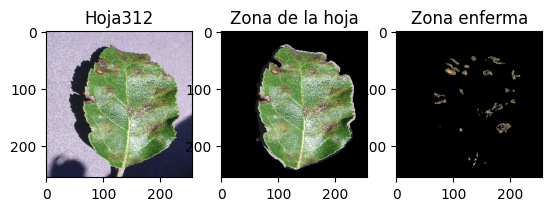

In [53]:
img = cv2.imread(PATH + str(800) + ".jpg", cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Convertir la imagen al espacio de color HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definir el rango de color de la hoja en HSV
lower_green = np.array([30, 30, 30])  # Ajusta los valores según tus necesidades
upper_green = np.array([70, 255, 255])  # Ajusta los valores según tus necesidades

# Aplicar la segmentación por umbralización en el espacio de color HSV
mask = cv2.inRange(hsv, lower_green, upper_green)

# Invertir la máscara para obtener el fondo en negro y la hoja en blanco
mask_inverse = cv2.bitwise_not(mask)

# Aplicar la máscara invertida a la imagen original
result = cv2.bitwise_and(img, img, mask=mask_inverse)
##### Fondo ok, zona sana nok, zona enferma ok#########################


gray_segmentation = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
# Aplicar una umbralización para obtener los píxeles que superan el umbral
threshold_value = 0  # Ajusta este valor según tus necesidades
_, binary_segmentation = cv2.threshold(gray_segmentation, threshold_value, 255, cv2.THRESH_BINARY)
result2 = cv2.bitwise_and(img, img, mask=mask)

###F Fondo NOK, zona sana ok, enfermedad NOK###################

kernel_3 = 3
kernel_3 = np.ones((kernel_3, kernel_3), np.uint8)
dilated_segmentation_32 = cv2.dilate(binary_segmentation, kernel_3, iterations=2)
closed_segmentation_32 = cv2.erode(binary_segmentation, kernel_3, iterations=2)
edges = cv2.Canny(closed_segmentation_32, 30, 70)  # Ajusta los valores de umbral según tus necesidades
# Dibujar los contornos encontrados en la imagen original
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


####### IMAGEN BINARIA FONDO 255, ZONA SANA 0, ZONA ENFERMA 255 (closed segmentation_32)#######
plt.subplot(111)
plt.imshow(closed_segmentation_32)
plt.title('closed_segmentation_32')



# Aplicar una operación morfológica de cierre para cerrar los contornos
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed_image = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Encontrar los contornos en la imagen cerrada
contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calcular el área de cada contorno y encontrar el contorno más grande
max_area = 0
max_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        max_contour = contour

# Crear una imagen binaria donde los píxeles tomen el valor de 255 en el contorno más grande y 0 en el resto de regiones
binary_image = np.zeros_like(edges)
cv2.drawContours(binary_image, [max_contour], -1, 255, cv2.FILLED)


###### Imagen binaria, mascara de la hoja, fondo 0, toda la hoja 255


segmented_image = cv2.bitwise_and(img, img, mask=binary_image.astype(np.uint8))
###### Imagen original fondo 0, toda la hoja 255 segmented_image


hsv_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2HSV)

# Definir el rango de colores para las zonas deseadas en HSV
lower_range = np.array([0, 50, 50])
upper_range = np.array([30, 255, 255])

# Crear una máscara para los píxeles dentro del rango
mask = cv2.inRange(hsv_image, lower_range, upper_range)

# Aplicar la máscara a la imagen segmentada
Zonaenferma = cv2.bitwise_and(segmented_image, segmented_image, mask=mask)

# Mostrar la imagen segmentada con las zonas de interés resaltadas

plt.subplot(131)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Hoja' +str(name))

plt.subplot(132)
segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)
plt.imshow(segmented_image)
plt.title('Zona de la hoja')

plt.subplot(133)
non_green_segmented_image = cv2.cvtColor(Zonaenferma, cv2.COLOR_BGR2RGB)
plt.imshow(non_green_segmented_image)
plt.title('Zona enferma')